In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy.interpolate import interp1d
import importlib

from source import plots
from source import prob_dists as pd


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
n = 0
params = {'R_G': 220, # Kpc
          'd_solar': 8.5, # kpc
          'psi': 80,
          'M_min': 1.0e-2, # Msun
          'M_max': 1.0e10, # Msun
          'fwimp': 1.0,
          'mean_params': {'a':77.4, 'b':0.87+0.31*n, 'c':-0.23-0.04*n},
          'nside': 2048,
          'area_fermi': 2000.0, # cm^2
          'n': n,
          'log_flux_min': -15, # log10 photons/cm^2/yr
          'log_flux_max': -7, # log10 photons/cm^2/yr
          'N': 10000,
          'log_k_min': 3,
          'log_k_max': 9,
          'N_k': 10000,
          'psh_log_f_min': -8,
          'psh_log_f_max': -6,
          'N_psh': 500
         }

params['omega_pixel'] = 4.*np.pi/(12*params['nside']**2.) # sr
p = params

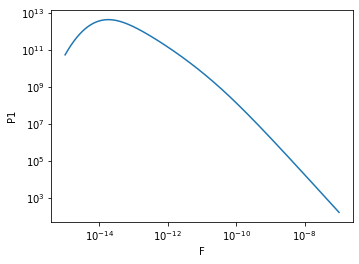

In [26]:
fluxes = np.logspace(p['log_flux_min'], p['log_flux_max'], num=p['N'])
p1_vals = pd.p1(fluxes, **p)
fig, _ = plots.check_p1_plot(fluxes, p1_vals)

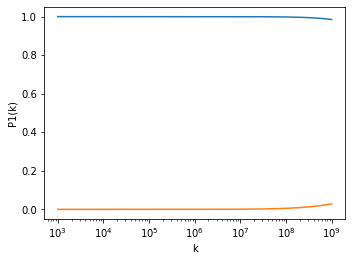

In [27]:
muu = pd.mu(**p)
ft_p1_vals, k = pd.ft_p1(p1_vals, fluxes, **p)
fig, _ = plots.check_ft_p1_plot(k, ft_p1_vals)

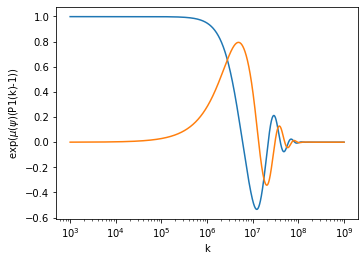

In [28]:
fig, _ = plots.check_psh_integrand_plot(k, ft_p1_vals, muu)



In [29]:
pf_vals, flux = pd.pf(muu, ft_p1_vals, k, **p)

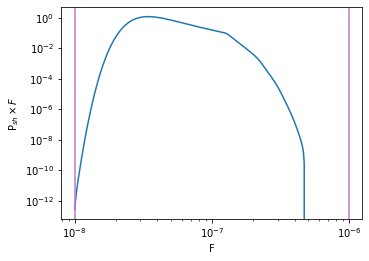

In [30]:
startl = 0
limi = -1
fig, _ = plots.check_psh_plot(flux, pf_vals.real, j=[startl, limi])

# print(pf_vals)

In [31]:
print(f'\mu \int F P1: {(muu * integrate.simps(fluxes * p1_vals, fluxes))}')
print(f' \int F Psh: {integrate.simps(pf_vals[startl:limi].real * flux[startl:limi], flux[startl:limi])}')



\mu \int F P1: [4.63011476e-08]
 \int F Psh: 4.622081064771558e-08


Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 4.630116927688521e-08
 \int F Psh: 4.6221467707881714e-08
percent error = -0.17%



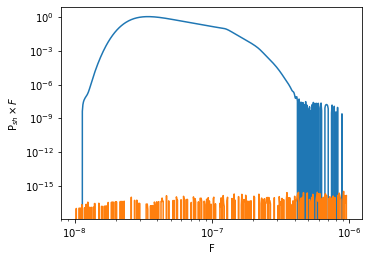

In [9]:
pshvals, fxs = pd.psh(params, plot=True, infer_values=True)

 \int F Psh: 4.622081085599073e-08


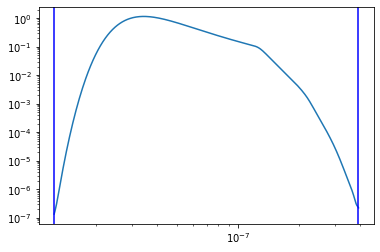

In [10]:
plt.plot(fxs, fxs * pshvals.real)
ax = plt.gca()
startl = 0
limi = -1
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(fxs[startl], color='b')
ax.axvline(fxs[limi], color='b')

print(f' \int F Psh: {integrate.simps(pshvals[startl:limi].real * fxs[startl:limi], fxs[startl:limi])}')



Angle: 40.0
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 9.922695415554573e-08
 \int F Psh: 9.89964691131717e-08
percent error = -0.23%

Angle: 43.57142857142857
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 9.098194908984566e-08
 \int F Psh: 9.077667019136716e-08
percent error = -0.23%

Angle: 47.142857142857146
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 8.380871215012229e-08
 \int F Psh: 8.36249472850902e-08
percent error = -0.22%

Angle: 50.714285714285715
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 7.752468516074197e-08
 \int F Psh: 7.735941695779657e-08
percent error = -0.21%

Angle: 54.285714285714285
Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 7.1

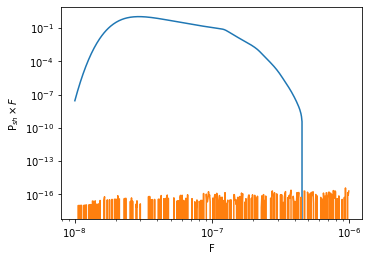

In [11]:
numnum = 15
psis = np.linspace(40, 90, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []

for psi, col in zip(psis, colors):
    p['psi'] = psi
    print('Angle:', psi)
    pshvals, fxs = pd.psh(params, plot=True, infer_values=True)
    
    psh_vals_over_psi.append((pshvals, fxs))
    
    ax.plot(fxs, fxs * pshvals.real, label=rf"{psi}$^\circ$", color=col)
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs);

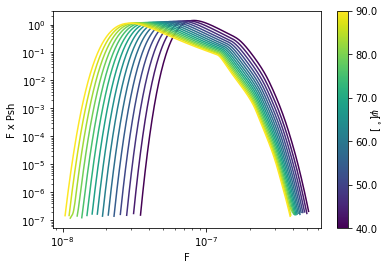

In [12]:
fig.savefig('./output/psh_n0.png')
fig

In [13]:
from scipy import interpolate as intp
numnum = 15
psis = np.linspace(40, 90, num=numnum)
fluxes = np.logspace(-8, -6, num=100)
interp_array = np.zeros((len(fluxes), len(psis)))

for i, (pshvals, fluxxes) in enumerate(psh_vals_over_psi):
    func = intp.interp1d(fluxxes, pshvals.real, fill_value='extrapolate', bounds_error=False)
    interp_array[:, i] = func(fluxes)

In [14]:
np.savez('./output/n0_pshfunc.npz', flux=fluxes, psi=psis, psh=interp_array)

In [15]:
with np.load('./output/n0_pshfunc.npz') as f:
    flux = f['flux']
    psi = f['psi']
    psh = f['psh']
    
print(psh.shape, flux.shape)

(100, 15) (100,)


In [16]:
psh2d = intp.interp2d(psi, flux, psh, bounds_error=False, fill_value=0)
print(psh.shape)

# psh2d = intp.RectBivariateSpline(flux, psi, psh, s=0.05)

(100, 15)


[Text(1, 0, '40.0'),
 Text(1, 0, '50.0'),
 Text(1, 0, '60.0'),
 Text(1, 0, '70.0'),
 Text(1, 0, '80.0'),
 Text(1, 0, '90.0')]

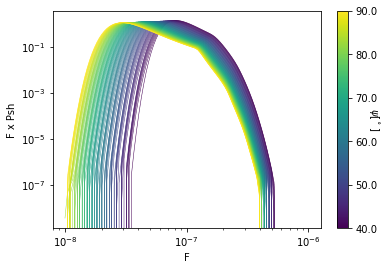

In [17]:
numnum =100

psis = np.linspace(40, 90, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []
fxs = flux
for psi, col in zip(psis, colors):
    ax.plot(fxs, fxs * psh2d(psi, fxs).flatten(), label=rf"{psi}$^\circ$", color=col, lw=0.5)
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs)

In [18]:
def pc()

SyntaxError: invalid syntax (<ipython-input-18-25ddd802edb0>, line 1)